# Worksheet 21

Name:  Ekaterina Azarova

UID: U88633327

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[-4, 2], [3, -4]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

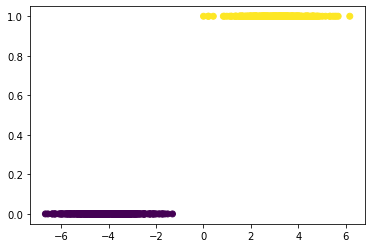

In [2]:
X, Y = generate_line_data()
fig, ax = plt.subplots()
ax.scatter(X[:, 0], Y, c=Y), 
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [3]:
from scipy.special import expit

model = LogisticRegression().fit(X, Y)
# printing out w and b from wx + b = 0
print("LogisticRegression:")
print("model.coef_:")
print(model.coef_)
print("model.intercept_:")
print(model.intercept_)
# wx + b = 0 => x = -b/w = -model.intercept_[0]/model.coef_[0][0]
print("Decision Boundary = ", -model.intercept_[0]/model.coef_[0][0])

LogisticRegression:
model.coef_:
[[ 1.47409597 -1.21125972]]
model.intercept_:
[-0.54185548]
Decision Boundary =  0.36758493986422974


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

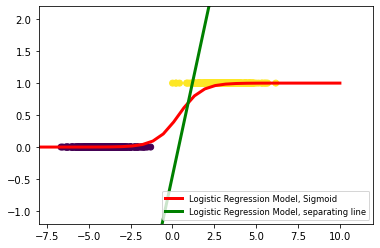

In [4]:
X_test = np.linspace(-8, 10, 30)

loss = expit(X_test * model.coef_[0][0] + model.intercept_[0]).ravel()
fig, ax = plt.subplots()
ax.scatter(X[:, 0], Y, c=Y), 
plt.plot(X_test, loss, label="Logistic Regression Model, Sigmoid", color="red", linewidth=3)
plt.plot(X_test, (-model.intercept_ / model.coef_[0][1] - model.coef_[0][0] * X_test / model.coef_[0][1]), \
         label="Logistic Regression Model, separating line", color="green", linewidth=3)
plt.ylim(-1.2, 2.2)
plt.xlim(-8, 12)
plt.legend(loc="lower right",fontsize="small")
plt.show()

# where is the line that separates our classes?

# The line that separates classes is green on the plot: 
# y = -model.intercept_ / model.coef_[0][1] - model.coef_[0][0] * x / model.coef_[0][1]

d) Using the above code, generate and plot the CIRCLE data.

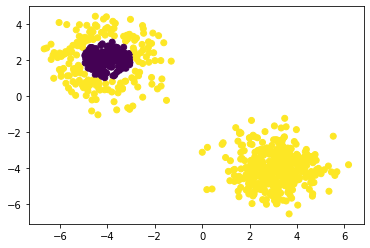

In [5]:
X, Y = generate_circle_data(t)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=Y), 
plt.show()

#model = LogisticRegression().fit(X, Y)
#loss = expit(X_test * model.coef_[0][0] + model.intercept_[0]).ravel()
#fig, ax = plt.subplots()
#ax.scatter(X[:, 0], X[:, 1], c=Y), 
#plt.plot(X_test, loss, label="Logistic Regression Model, Sigmoid", color="red", linewidth=3)
#plt.plot(X_test, (-model.intercept_ / model.coef_[0][1] - model.coef_[0][0] * X_test / model.coef_[0][1]), \
#         label="Logistic Regression Model, separating line", color="green", linewidth=3)
#plt.ylim(-10.2, 11.2)
#plt.xlim(-8, 12)
#plt.legend(loc="lower right",fontsize="small") # upper left
#plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

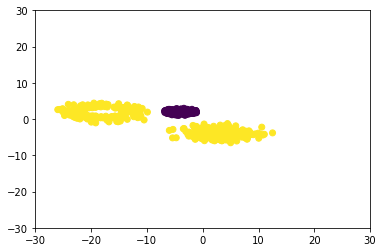

In [6]:
x_scale = 3.0
for i in range(len(X)):
  cl_idx = Y[i]
  X[i][0] = np.array( (X[i][0] - centers[cl_idx][0])*x_scale + centers[cl_idx][0] )

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:, 1], c=Y), 
plt.ylim(-30., 30.)
plt.xlim(-30, 30.)
plt.show()

# equation is relationship between features x and y
# can use polynomial features thing... with degree 2

model = LogisticRegression().fit(X, Y)


f) Plot the decision boundary using the code below.

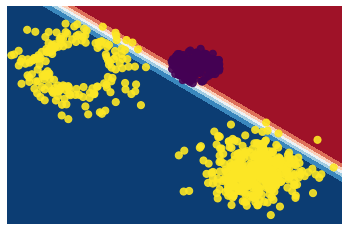

In [7]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

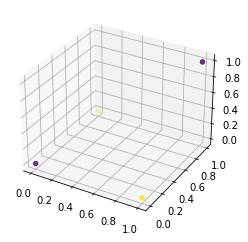

In [8]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()
# does not have a closed form formula... results may be random and not the best

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

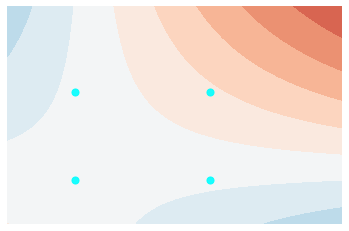

In [9]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

In [11]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        #print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

ModuleNotFoundError: No module named 'ipympl'

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\katya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[[-1.55736971e-03 -3.32066657e-02  8.62267130e-02 -4.38527146e+00
   9.76371725e-03 -4.20593278e+00]
 [ 1.69190332e-03 -1.28745938e-02 -3.88720467e-02  5.04778323e-01
   1.06961068e-02  4.13488486e-01]
 [-1.34533608e-04  4.60812595e-02 -4.73546663e-02  3.88049313e+00
  -2.04598241e-02  3.79244429e+00]]
[ 15.34649179   5.87427036 -21.22076215]


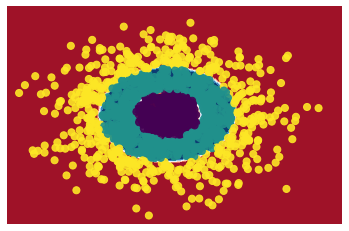

In [12]:
centers = [[0,0]]
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

print(lr.coef_)
print(lr.intercept_)

# from f)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()
